# 04. 오토 인코더 (Auto Encoder)
> 자기자신의 입력을 학습하는 오토 인코더에 대해 알아봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 8]
- permalink: /auto_encoder
- exec: colab

### 1. 오토 인코더란?

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

오토인코더는 대표적인 신경망 기반 비지도학습 기법으로 차원축소, 이미지 압축, 이미지 노이즈 제거, 이미지 생성 등에 사용되는 신경망 구조입니다. 오토인코더의 가장 큰 특징은 입력을 다시 라벨로 사용한다는 점입니다. <br><br>

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F9980AE495AA4BCF40BAEE6)

이 구조를 보면 입력을 히든 레이어로 인코딩하고 인코딩된 히든 유닛을 디코딩해서 입력과 사이즈가 같은 텐서를 출력합니다. 이때 인코딩 과정에서 입력이 히든레이어로 이동하면서 작아지게 되는데, 이렇게 작아진 히든레이어의 가중치가 곧 압축된 벡터를 의미하게 됩니다. (Word2Vec의 방식과 동일합니다) <br><br>

기본적으로 우리는 지도학습의 Loss함수를 다음과 같이 배웠습니다. $\sum_i (y - \hat{y})^2$ 그러나, 비지도학습의 경우에는 정답열 $y$가 없습니다. 오토인코더 역시 비지도학습 방법이고 라벨이 없습니다. 오토인코더는 그러면 어떻게 위와 같은 작업을 수행할까요? 오토인코더는 입력데이터를 라벨로서 한번 더 사용합니다.

<br>
$$
Loss Function = \sum_i (x - \hat(y))^2
$$
<br>

이렇게 되면 모델의 출력과 입력이 점점 비슷해집니다. 따라서 모델은 입력의 특징에 대해 배우게 되고, 출력 데이터가 입력데이터를 흉내내게 됩니다. 이러한 특성을 응용하여 노이즈 제거, 데이터 생성 등에 응용할 수 있습니다. <br><br>

### 2. 간단한 오토인코더를 만들어봅시다.

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 인코딩 차원 (압축시킬 차원)
encdoing_dim = 32 

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np


(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
train_feature = train_feature.astype(np.float32)
test_feature = test_feature.astype(np.float32)
train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)

train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)
train_feature /= 255.0
test_feature /= 255.0
train_feature = train_feature.squeeze().reshape(len(train_feature), -1)
test_feature = test_feature.squeeze().reshape(len(test_feature), -1)

In [3]:
input_img = Input(shape=(784))
encoded = Dense(encdoing_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_feature, train_feature, # 자기 자신이 라벨입니다.
                epochs=50,
                batch_size=256,
                shuffle=True)

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2784
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1687
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1438
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1287
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1181
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1107
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1055
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1019
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0994
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976
Epoch 11/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0964
Epoch 12/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0956
Epoch 13/50
235/235 [====

In [5]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
decoded_imgs = autoencoder.predict(test_feature)

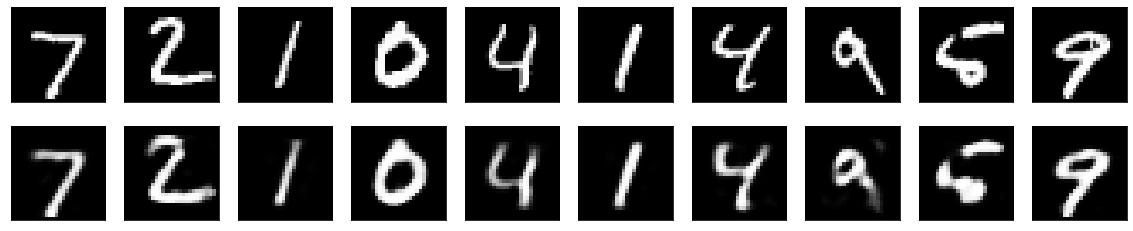

In [6]:
# Matplotlib 사용
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_feature[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<br>

### 3. Deep Autoencoder (깊은 오토인코더)

오토인코더가 입력을 잘 복제했습니다. 오토인코더도 역시 신경망이기 때문에 깊은 구조로 학습시킬 수 있습니다. 깊은 오토인코더를 학습시켜봅시다.

In [7]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_feature, train_feature,
                epochs=100,
                batch_size=256,
                shuffle=True)

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2414
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1480
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1292
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1201
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1143
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1098
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1067
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1043
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1024
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1006
Epoch 11/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0991
Epoch 12/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0980
Epoch 13/100


In [9]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
decoded_imgs = autoencoder.predict(test_feature)

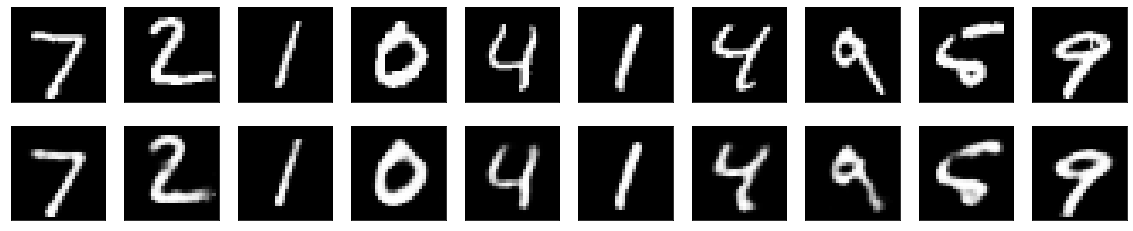

In [10]:
# Matplotlib 사용
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_feature[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<br>

### 3. Convolutional Autoencoder (합성곱 오토인코더)

마찬가지로 잘 복제해냈습니다. 합성곱신경망을 이용한 오토인코더 (Convonlutional Auto Encoder도) 만들 수 있습니다. 먼저, 입력이 flatten 되어있는 상태이기 때문에 이미지를 다시 불러옵니다.

In [11]:
from tensorflow.keras.datasets import mnist
import numpy as np


(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
train_feature = train_feature.astype(np.float32)
test_feature = test_feature.astype(np.float32)
train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)

train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)
train_feature /= 255.0
test_feature /= 255.0

In [12]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_img = Input(shape=(28, 28, 1))  
# 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# 이 시점에서 표현(representatoin)은 (4,4,8) 즉, 128 차원
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [13]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_feature, train_feature,
                epochs=100,
                batch_size=256,
                shuffle=True)

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2677
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1565
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1398
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1301
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1242
Epoch 6/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1203
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1173
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1150
Epoch 9/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1131
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1116
Epoch 11/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1103
Epoch 12/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1091
Epoch 13/100


In [14]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
decoded_imgs = autoencoder.predict(test_feature)

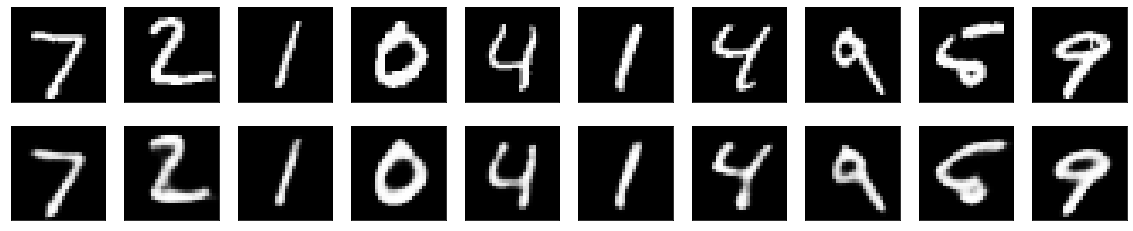

In [15]:
# Matplotlib 사용
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_feature[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<br>

### 4. Denoising Autoencoder (노이즈제거 오토인코더)

마찬가지로 잘 복제해냈습니다. 이제 조금 더 응용해서 이미지에 끼어있는 노이즈를 오토인코더로 제거해봅시다. 이 경우, 입력(x)는 노이즈 이미지, 출력(y)는 정상이미지가 됩니다. 따라서 오토인코더는 노이즈 이미지를 정상 이미지로 만드는 방법을 학습하게 됩니다.


In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np


(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
train_feature = train_feature.astype(np.float32)
test_feature = test_feature.astype(np.float32)
train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)

train_feature = np.expand_dims(train_feature, axis=3)
test_feature = np.expand_dims(test_feature, axis=3)
train_feature /= 255.0
test_feature /= 255.0

noise_factor = 0.5
train_noisy = train_feature + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_feature.shape) 
test_noisy = test_feature + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_feature.shape) 
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

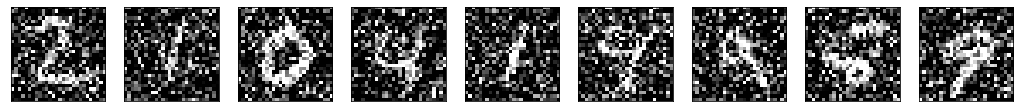

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

자세히 들여다보면 어떤 숫자인지 알 수 있지만 알아보기 힘듭니다. 어떻게 autoencoder는 원본 숫자로 복원하는 법을 배울 수 있었을까요? 알아봅시다. 이전의 convolutional autoencoder와 비교해서, 재구성된 이미지의 질을 향상시키려면, 약간 다른 모델을 사용하여 layer 당 더 많은 필터를 사용합니다.

In [18]:
input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [22]:
autoencoder.fit(train_noisy, train_feature,
                epochs=300,
                batch_size=128,
                shuffle=True)

Epoch 1/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1456
Epoch 2/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1453
Epoch 3/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1450
Epoch 4/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1447
Epoch 5/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1445
Epoch 6/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1442
Epoch 7/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1439
Epoch 8/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1437
Epoch 9/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1434
Epoch 10/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1432
Epoch 11/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1429
Epoch 12/300
469/469 [==============================] - 3s 6ms/step - loss: 0.1427
Epoch 13/300


In [20]:
# 숫자들을 인코딩 / 디코딩
# test set에서 숫자들을 가져왔다는 것을 유의
decoded_imgs = autoencoder.predict(test_noisy)

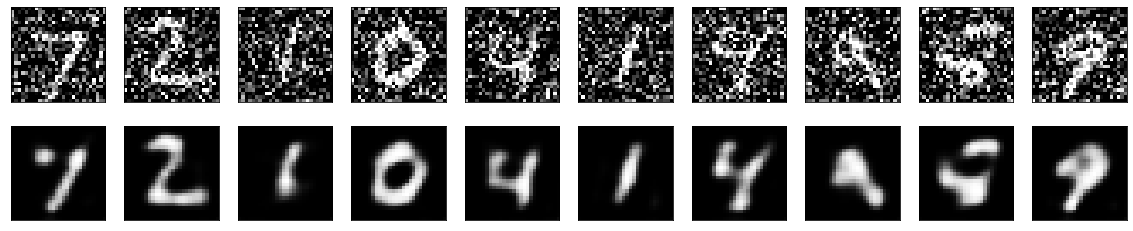

In [21]:
# Matplotlib 사용
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()